In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

In [35]:
data = pd.read_csv('train.csv')
X_train = data.drop('label', axis = 1)
X_train = X_train.values.reshape(-1,28,28,1)
Y_train = data['label']
test = pd.read_csv('test.csv')
test = test.values.reshape(-1, 28, 28, 1)

In [36]:
X_train = X_train/255
test = test/255

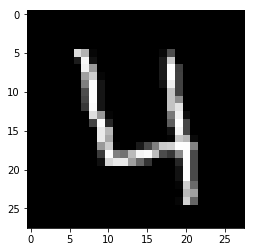

In [37]:
plt.imshow(X_train[3][:, :, 0], cmap = 'gray')

In [38]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 42)

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 padding = 'Same', activation ='relu',
                 input_shape = (28,28,1), strides = (1,1)))

model.add(MaxPool2D(pool_size=(2,2), strides = (2, 2)))

model.add(Conv2D(filters = 2, kernel_size = (3, 3),
                 padding = 'Same', activation = 'relu',
                 input_shape = (14, 14, 32), strides = (1, 1)))

model.add(MaxPool2D(pool_size = (2, 2) , strides = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

In [41]:
from keras import optimizers

optmizer = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [42]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=["accuracy"])

In [43]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [46]:
batch_size = 86
epochs = 10
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val), verbose = 1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 37s 975us/step - loss: 0.0945 - accuracy: 0.9710 - val_loss: 0.0717 - val_accuracy: 0.9781
Epoch 2/10
37800/37800 [==============================] - 41s 1ms/step - loss: 0.0890 - accuracy: 0.9721 - val_loss: 0.0725 - val_accuracy: 0.9798
Epoch 3/10
37800/37800 [==============================] - 30s 788us/step - loss: 0.0895 - accuracy: 0.9733 - val_loss: 0.0803 - val_accuracy: 0.9755
Epoch 4/10
37800/37800 [==============================] - 36s 941us/step - loss: 0.0833 - accuracy: 0.9750 - val_loss: 0.0709 - val_accuracy: 0.9781
Epoch 5/10
37800/37800 [==============================] - 39s 1ms/step - loss: 0.0813 - accuracy: 0.9738 - val_loss: 0.0645 - val_accuracy: 0.9821
Epoch 6/10
37800/37800 [==============================] - 32s 848us/step - loss: 0.0806 - accuracy: 0.9755 - val_loss: 0.0686 - val_accuracy: 0.9788
Epoch 7/10
37800/37800 [==============================] - 32s

In [47]:
def salvar_rede(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

In [48]:
salvar_rede(model)

Saved model to disk
